# Project P77: Document Classification

## Business objective- The document classification solution should significantly reduce the manual human effort in the HRM and financial department. It should achieve a higher level of accuracy and automation with minimal human intervention

### Sample Data Set Details: Resumes and financial documents

In [1]:
# !pip install tika
# !pip install docxpy
# !pip install pdfminer
# !pip install wordcloud
# !pip install xgboost

In [2]:
# Importing Libraries
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
from os.path import splitext
import os
import re
import nltk
import pandas as pd
import numpy as np
import docxpy
from tika import parser
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
def splitext_(path):
    if len(path.split('.')) > 2:
        return path.split('.')[0],'.'.join(path.split('.')[-2:])
    return splitext(path)

def text_preprocess(text):
    cleaned_text =  re.sub(r"[^a-zA-Z0-9.]", ' ', text)  
    return cleaned_text

# extracting text from pdf file

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    try:
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,\
                                  caching=caching, check_extractable=True):
            interpreter.process_page(page)
    except:
        print('This pdf won\'t allow text extraction!')        
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()
    return str
 

extracted = []    

# Based on the extension of file, extracting text

for foldername,subfolders,files in os.walk(r'C:\Users\DIKSHA\Documents\pythonfiles\Resumes'):
    for file_ in files:
        dict_ = {}
        file_name,extension = splitext_(file_)
        if extension == '.pdf':
            converted = convert_pdf_to_txt(foldername +'/'+ file_)
            converted = text_preprocess(converted)
            dict_['Name'] = file_name
            dict_['Resume_Text'] = converted
            extracted.append(dict_)
            
        elif extension == '.docx':
            doc = docxpy.process(foldername +'/'+ file_)
            doc = text_preprocess(doc)
            dict_['Name'] = file_name
            dict_['Resume_Text'] = doc
            extracted.append(dict_)

            # For .ppt format
#         elif extension == '.ppt':
#             parsed = parser.from_file(foldername +'/'+ file_)
#             ppt = parsed["content"]
#             ppt = text_preprocess(ppt)
#             dict_['Name'] = file_name
#             dict_['Resume_Text'] = ppt
#             extracted.append(dict_)   
        
            
        df =  pd.DataFrame(extracted)
        print(df)
        df.to_csv('Resume_data.csv')

                            Name  \
0  Peoplesoft Admin_AnubhavSingh   

                                         Resume_Text  
0  Anubhav Kumar Singh      Core Competencies    ...  
                               Name  \
0     Peoplesoft Admin_AnubhavSingh   
1  Peoplesoft Admin_G Ananda Rayudu   

                                         Resume_Text  
0  Anubhav Kumar Singh      Core Competencies    ...  
1  G. Ananda Rayudu            https   www.linked...  
                               Name  \
0     Peoplesoft Admin_AnubhavSingh   
1  Peoplesoft Admin_G Ananda Rayudu   
2       Peoplesoft Admin_Gangareddy   

                                         Resume_Text  
0  Anubhav Kumar Singh      Core Competencies    ...  
1  G. Ananda Rayudu            https   www.linked...  
2  PeopleSoft Database Administrator             ...  
                               Name  \
0     Peoplesoft Admin_AnubhavSingh   
1  Peoplesoft Admin_G Ananda Rayudu   
2       Peoplesoft Admin_Gangareddy   
3

                                   Name  \
0         Peoplesoft Admin_AnubhavSingh   
1      Peoplesoft Admin_G Ananda Rayudu   
2           Peoplesoft Admin_Gangareddy   
3               Peoplesoft Admin_Murali   
4    Peoplesoft Admin_Priyanka Ramadoss   
5   Peoplesoft Admin_SirazuddinMohammad   
6         Peoplesoft Admin_srinivasarao   
7        Peoplesoft Admin_Varkala Vikas   
8         Peoplesoft Admin_Vinod Akkala   
9          PeopleSoft DBA_Ganesh Alladi   
10     PeopleSoft DBA_Vivekanand Sayana   
11         Peoplesoft Finance_Arun Venu   
12     Peoplesoft Finance_Pritam Biswas   

                                          Resume_Text  
0   Anubhav Kumar Singh      Core Competencies    ...  
1   G. Ananda Rayudu            https   www.linked...  
2   PeopleSoft Database Administrator             ...  
3   Classification  Internal  Classification  Inte...  
4   Priyanka Ramadoss   61 46  MountPleasant     C...  
5   SIRAZUDDIN M   Bangalore  INDIA       SIRAZUDD...  
6   P

                                               Name  \
0                     Peoplesoft Admin_AnubhavSingh   
1                  Peoplesoft Admin_G Ananda Rayudu   
2                       Peoplesoft Admin_Gangareddy   
3                           Peoplesoft Admin_Murali   
4                Peoplesoft Admin_Priyanka Ramadoss   
5               Peoplesoft Admin_SirazuddinMohammad   
6                     Peoplesoft Admin_srinivasarao   
7                    Peoplesoft Admin_Varkala Vikas   
8                     Peoplesoft Admin_Vinod Akkala   
9                      PeopleSoft DBA_Ganesh Alladi   
10                 PeopleSoft DBA_Vivekanand Sayana   
11                     Peoplesoft Finance_Arun Venu   
12                 Peoplesoft Finance_Pritam Biswas   
13                   Peoplesoft Finance_Rahul Ahuja   
14                     Peoplesoft FSCM_HariNarayana   
15                           Peoplesoft FSCM_Murali   
16                   Peoplesoft FSCM_PriyabrataHota   
17        

                                               Name  \
0                     Peoplesoft Admin_AnubhavSingh   
1                  Peoplesoft Admin_G Ananda Rayudu   
2                       Peoplesoft Admin_Gangareddy   
3                           Peoplesoft Admin_Murali   
4                Peoplesoft Admin_Priyanka Ramadoss   
5               Peoplesoft Admin_SirazuddinMohammad   
6                     Peoplesoft Admin_srinivasarao   
7                    Peoplesoft Admin_Varkala Vikas   
8                     Peoplesoft Admin_Vinod Akkala   
9                      PeopleSoft DBA_Ganesh Alladi   
10                 PeopleSoft DBA_Vivekanand Sayana   
11                     Peoplesoft Finance_Arun Venu   
12                 Peoplesoft Finance_Pritam Biswas   
13                   Peoplesoft Finance_Rahul Ahuja   
14                     Peoplesoft FSCM_HariNarayana   
15                           Peoplesoft FSCM_Murali   
16                   Peoplesoft FSCM_PriyabrataHota   
17        

                                               Name  \
0                     Peoplesoft Admin_AnubhavSingh   
1                  Peoplesoft Admin_G Ananda Rayudu   
2                       Peoplesoft Admin_Gangareddy   
3                           Peoplesoft Admin_Murali   
4                Peoplesoft Admin_Priyanka Ramadoss   
5               Peoplesoft Admin_SirazuddinMohammad   
6                     Peoplesoft Admin_srinivasarao   
7                    Peoplesoft Admin_Varkala Vikas   
8                     Peoplesoft Admin_Vinod Akkala   
9                      PeopleSoft DBA_Ganesh Alladi   
10                 PeopleSoft DBA_Vivekanand Sayana   
11                     Peoplesoft Finance_Arun Venu   
12                 Peoplesoft Finance_Pritam Biswas   
13                   Peoplesoft Finance_Rahul Ahuja   
14                     Peoplesoft FSCM_HariNarayana   
15                           Peoplesoft FSCM_Murali   
16                   Peoplesoft FSCM_PriyabrataHota   
17        

                                               Name  \
0                     Peoplesoft Admin_AnubhavSingh   
1                  Peoplesoft Admin_G Ananda Rayudu   
2                       Peoplesoft Admin_Gangareddy   
3                           Peoplesoft Admin_Murali   
4                Peoplesoft Admin_Priyanka Ramadoss   
5               Peoplesoft Admin_SirazuddinMohammad   
6                     Peoplesoft Admin_srinivasarao   
7                    Peoplesoft Admin_Varkala Vikas   
8                     Peoplesoft Admin_Vinod Akkala   
9                      PeopleSoft DBA_Ganesh Alladi   
10                 PeopleSoft DBA_Vivekanand Sayana   
11                     Peoplesoft Finance_Arun Venu   
12                 Peoplesoft Finance_Pritam Biswas   
13                   Peoplesoft Finance_Rahul Ahuja   
14                     Peoplesoft FSCM_HariNarayana   
15                           Peoplesoft FSCM_Murali   
16                   Peoplesoft FSCM_PriyabrataHota   
17        

                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             Peoplesoft FSCM_Murali   
16                     Peopleso

                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             Peoplesoft FSCM_Murali   
16                     Peopleso

                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             Peoplesoft FSCM_Murali   
16                     Peopleso

                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             Peoplesoft FSCM_Murali   
16                     Peopleso

47  KAMBALLA PRADEEP                              ...  
                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             P

                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             Peoplesoft FSCM_Murali   
16                     Peopleso

53  RAJU PAVANA KUMARI        Professional Summary...  
                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             P

                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             Peoplesoft FSCM_Murali   
16                     Peopleso

                                                 Name  \
0                       Peoplesoft Admin_AnubhavSingh   
1                    Peoplesoft Admin_G Ananda Rayudu   
2                         Peoplesoft Admin_Gangareddy   
3                             Peoplesoft Admin_Murali   
4                  Peoplesoft Admin_Priyanka Ramadoss   
5                 Peoplesoft Admin_SirazuddinMohammad   
6                       Peoplesoft Admin_srinivasarao   
7                      Peoplesoft Admin_Varkala Vikas   
8                       Peoplesoft Admin_Vinod Akkala   
9                        PeopleSoft DBA_Ganesh Alladi   
10                   PeopleSoft DBA_Vivekanand Sayana   
11                       Peoplesoft Finance_Arun Venu   
12                   Peoplesoft Finance_Pritam Biswas   
13                     Peoplesoft Finance_Rahul Ahuja   
14                       Peoplesoft FSCM_HariNarayana   
15                             Peoplesoft FSCM_Murali   
16                     Peopleso

                                   Name  \
0         Peoplesoft Admin_AnubhavSingh   
1      Peoplesoft Admin_G Ananda Rayudu   
2           Peoplesoft Admin_Gangareddy   
3               Peoplesoft Admin_Murali   
4    Peoplesoft Admin_Priyanka Ramadoss   
..                                  ...   
56            SQL Tatikonda Kiran Kumar   
57                          SQL Vinod B   
58      Workday  ShireeshKumar_Hexaware   
59  Workday ChinnaSubbarayuduM_Hexaware   
60        Workday Gopi Krishna_Hexaware   

                                          Resume_Text  
0   Anubhav Kumar Singh      Core Competencies    ...  
1   G. Ananda Rayudu            https   www.linked...  
2   PeopleSoft Database Administrator             ...  
3   Classification  Internal  Classification  Inte...  
4   Priyanka Ramadoss   61 46  MountPleasant     C...  
..                                                ...  
56  Tatikonda Kiran Kumar.          Career objecti...  
57  SQL AND MSBI DEVELOPER  SQL AND

                                  Name  \
0        Peoplesoft Admin_AnubhavSingh   
1     Peoplesoft Admin_G Ananda Rayudu   
2          Peoplesoft Admin_Gangareddy   
3              Peoplesoft Admin_Murali   
4   Peoplesoft Admin_Priyanka Ramadoss   
..                                 ...   
63         Workday Hima Mendu_Hexaware   
64         Workday Himaja G_(Hexaware)   
65    Workday J Sumanth Royal_Hexaware   
66          Workday Jyotiverma_Heaware   
67        Workday Madeeswar A_Hexaware   

                                          Resume_Text  
0   Anubhav Kumar Singh      Core Competencies    ...  
1   G. Ananda Rayudu            https   www.linked...  
2   PeopleSoft Database Administrator             ...  
3   Classification  Internal  Classification  Inte...  
4   Priyanka Ramadoss   61 46  MountPleasant     C...  
..                                                ...  
63  HIMA.MENDU         Career Objective  To contin...  
64  G Himaja                                   

[75 rows x 2 columns]
                                  Name  \
0        Peoplesoft Admin_AnubhavSingh   
1     Peoplesoft Admin_G Ananda Rayudu   
2          Peoplesoft Admin_Gangareddy   
3              Peoplesoft Admin_Murali   
4   Peoplesoft Admin_Priyanka Ramadoss   
..                                 ...   
71    Workday Punugoti Swetha_Hexaware   
72             Workday RahulM_Hexaware   
73            Workday RameshP_Hexaware   
74      Workday Sri Krishna S_Hexaware   
75           Workday Srikanth-Hexaware   

                                          Resume_Text  
0   Anubhav Kumar Singh      Core Competencies    ...  
1   G. Ananda Rayudu            https   www.linked...  
2   PeopleSoft Database Administrator             ...  
3   Classification  Internal  Classification  Inte...  
4   Priyanka Ramadoss   61 46  MountPleasant     C...  
..                                                ...  
71  Punugoti Swetha  Workday Technical Consultant ...  
72  Workday HCM  Techno f

In [4]:
df

,Name,Resume_Text
0,Peoplesoft Admin_AnubhavSingh,Anubhav Kumar Singh Core Competencies ...
1,Peoplesoft Admin_G Ananda Rayudu,G. Ananda Rayudu https www.linked...
2,Peoplesoft Admin_Gangareddy,PeopleSoft Database Administrator ...
3,Peoplesoft Admin_Murali,Classification Internal Classification Inte...
4,Peoplesoft Admin_Priyanka Ramadoss,Priyanka Ramadoss 61 46 MountPleasant C...
...,...,...
74,Workday Sri Krishna S_Hexaware,Workday Integration Consultant Name ...
75,Workday Srikanth-Hexaware,Srikanth WORKDAY hCM Consultant ...
76,Workday SSKumar_Hexaware,WORKDAY HCM FCM Name Kumar S.S Role ...
77,Workday Venkateswarlu B_Hexaware,Venkateswarlu.B Workday Consultant ...


In [5]:
df["category"] = ""
df.category[0:21]='Peoplesoft'
df.category[21:43]='Reactjs Developer'
df.category[43:60]='SQL Developer'
df.category[60:]='Workday'
df

,Name,Resume_Text,category
0,Peoplesoft Admin_AnubhavSingh,Anubhav Kumar Singh Core Competencies ...,Peoplesoft
1,Peoplesoft Admin_G Ananda Rayudu,G. Ananda Rayudu https www.linked...,Peoplesoft
2,Peoplesoft Admin_Gangareddy,PeopleSoft Database Administrator ...,Peoplesoft
3,Peoplesoft Admin_Murali,Classification Internal Classification Inte...,Peoplesoft
4,Peoplesoft Admin_Priyanka Ramadoss,Priyanka Ramadoss 61 46 MountPleasant C...,Peoplesoft
...,...,...,...
74,Workday Sri Krishna S_Hexaware,Workday Integration Consultant Name ...,Workday
75,Workday Srikanth-Hexaware,Srikanth WORKDAY hCM Consultant ...,Workday
76,Workday SSKumar_Hexaware,WORKDAY HCM FCM Name Kumar S.S Role ...,Workday
77,Workday Venkateswarlu B_Hexaware,Venkateswarlu.B Workday Consultant ...,Workday


In [6]:
df.shape

(79, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         79 non-null     object
 1   Resume_Text  79 non-null     object
 2   category     79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [8]:
df.isnull().sum()

Name           0
Resume_Text    0
category       0
dtype: int64

In [9]:
print (df['category'].value_counts())

Reactjs Developer    22
Peoplesoft           21
Workday              19
SQL Developer        17
Name: category, dtype: int64


In [10]:
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#     text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [11]:
df.head()

,Name,Resume_Text,category
0,Peoplesoft Admin_AnubhavSingh,Anubhav Kumar Singh Core Competencies ...,Peoplesoft
1,Peoplesoft Admin_G Ananda Rayudu,G. Ananda Rayudu https www.linked...,Peoplesoft
2,Peoplesoft Admin_Gangareddy,PeopleSoft Database Administrator ...,Peoplesoft
3,Peoplesoft Admin_Murali,Classification Internal Classification Inte...,Peoplesoft
4,Peoplesoft Admin_Priyanka Ramadoss,Priyanka Ramadoss 61 46 MountPleasant C...,Peoplesoft


In [12]:
def get_split(text1):
    l_total = []
    l_parcial = []
    if len(text1.split())//150 >0:
        n = len(text1.split())//150
    else: 
        n = 1
    for w in range(n):
        if w == 0:
            l_parcial = text1.split()[:200]
            l_total.append(" ".join(l_parcial))
        else:
            l_parcial = text1.split()[w*150:w*150 + 200]
            l_total.append(" ".join(l_parcial))
    return l_total

In [13]:
df['text_split'] = df['Resume_Text'].apply(get_split)
# df.head()

In [14]:
df.reset_index(drop=True, inplace=True)
# df.head()

In [15]:
df.shape

(79, 4)

In [16]:
train_l = []
Category_l = []
index_l =[]
for idx,row in df.iterrows():
    for l in row['text_split']:
        train_l.append(l)
        Category_l.append(row['category'])
        index_l.append(idx)
len(train_l),len(Category_l), len(index_l)

(345, 345, 345)

In [17]:
df = pd.DataFrame({'Resume_Text':train_l, 'category':Category_l})
df.head()

,Resume_Text,category
0,Anubhav Kumar Singh Core Competencies Scriptin...,Peoplesoft
1,on shell scripting used as integration method ...,Peoplesoft
2,applications. Worked on Elastic Search Configu...,Peoplesoft
3,Unix Linux Servers. Applying latest patch to P...,Peoplesoft
4,Servers Process Scheduler Servers Tuxedo Web l...,Peoplesoft


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

In [20]:
import pickle

In [21]:
X= tfidf_vectorizer.fit_transform(df['Resume_Text'])
pickle.dump(tfidf_vectorizer,open('eda.pkl','wb'))

In [22]:
y=df['category']

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [25]:
df.shape

(345, 2)

In [26]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [27]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_Text'].values
cleanedSentences = ""
for i in range(0,79):
    cleanedText = clean_text(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('peoplesoft', 419), ('server', 273), ('application', 265), ('experience', 264), ('database', 190), ('servers', 161), ('process', 126), ('domains', 126), ('web', 124), ('scheduler', 110), ('oracle', 109), ('project', 95), ('production', 91), ('people', 84), ('tools', 79), ('92', 79), ('change', 79), ('involved', 78), ('reports', 78), ('using', 73), ('data', 73), ('windows', 72), ('patches', 71), ('issues', 70), ('environment', 69), ('environments', 69), ('pum', 68), ('configuration', 66), ('fscm', 64), ('applications', 63), ('integration', 63), ('applying', 62), ('setup', 60), ('tuxedo', 58), ('troubleshooting', 58), ('peopletools', 58), ('hcm', 57), ('assistant', 57), ('performance', 56), ('configured', 55), ('like', 54), ('instances', 53), ('updates', 52), ('broker', 52), ('databases', 51), ('hrms', 50), ('support', 49), ('worked', 49), ('creating', 49), ('administration', 48)]


In [28]:
import numpy as np 
import re, os
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import nltk
import nltk as nlp
import string
import warnings
warnings.filterwarnings("ignore")
# import keras
# from keras.models import Model
# from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
# from tensorflow.keras.optimizers import RMSprop
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# from keras.callbacks import EarlyStopping

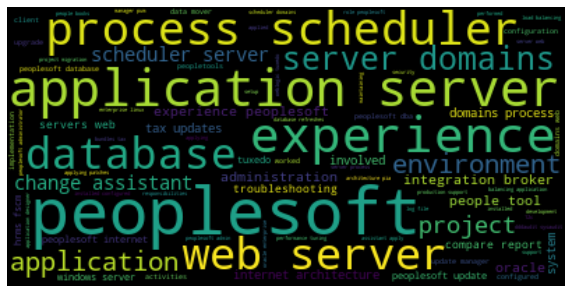

In [29]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
x_train,x_test,y_train,y_test = train_test_split(df['Resume_Text'], df['category'], test_size=0.2, random_state=10)

# Logistic Regression Classifier

In [31]:
log = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression(solver='lbfgs',random_state=7))])

model = log.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 92.75%


In [32]:
print(classification_report(y_test, prediction))

                   precision    recall  f1-score   support

       Peoplesoft       1.00      1.00      1.00        24
Reactjs Developer       1.00      0.92      0.96        13
    SQL Developer       0.86      0.80      0.83        15
          Workday       0.84      0.94      0.89        17

         accuracy                           0.93        69
        macro avg       0.92      0.92      0.92        69
     weighted avg       0.93      0.93      0.93        69



# Support Vector Classifier

In [33]:
Zsvc = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC(random_state=7))])

model = Zsvc.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 95.65%


In [34]:
print(classification_report(y_test, prediction))

                   precision    recall  f1-score   support

       Peoplesoft       1.00      1.00      1.00        24
Reactjs Developer       1.00      0.92      0.96        13
    SQL Developer       0.88      0.93      0.90        15
          Workday       0.94      0.94      0.94        17

         accuracy                           0.96        69
        macro avg       0.95      0.95      0.95        69
     weighted avg       0.96      0.96      0.96        69



# Multinomial Naive Bayes Classifier

In [35]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 84.06%


# Bernoulli Naive Bayes Classifier

In [36]:
classifier = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = classifier.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 89.86%


In [37]:
print(classification_report(y_test, prediction))

                   precision    recall  f1-score   support

       Peoplesoft       1.00      0.96      0.98        24
Reactjs Developer       1.00      0.92      0.96        13
    SQL Developer       0.79      0.73      0.76        15
          Workday       0.80      0.94      0.86        17

         accuracy                           0.90        69
        macro avg       0.90      0.89      0.89        69
     weighted avg       0.90      0.90      0.90        69



# Decision Tree

In [38]:
d_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 7, 
                                           splitter='best', 
                                           random_state=7))])

model = d_pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 86.96%


In [39]:
print(classification_report(y_test, prediction))

                   precision    recall  f1-score   support

       Peoplesoft       0.88      0.96      0.92        24
Reactjs Developer       1.00      0.69      0.82        13
    SQL Developer       0.87      0.87      0.87        15
          Workday       0.79      0.88      0.83        17

         accuracy                           0.87        69
        macro avg       0.89      0.85      0.86        69
     weighted avg       0.88      0.87      0.87        69



# Random Forest Classifier

In [40]:
r_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, max_features=7, criterion="entropy",random_state=7))])

model = r_pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 86.96%


# XG Boost

In [41]:
xg_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=7))])

model = xg_pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

[12:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "loss" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 86.96%


# Stochastic Gradient Descent

In [42]:
stc_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier(random_state=7))])

model = stc_pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 92.75%


In [43]:
print(classification_report(y_test, prediction))

                   precision    recall  f1-score   support

       Peoplesoft       0.96      0.96      0.96        24
Reactjs Developer       1.00      0.92      0.96        13
    SQL Developer       0.82      0.93      0.87        15
          Workday       0.94      0.88      0.91        17

         accuracy                           0.93        69
        macro avg       0.93      0.92      0.93        69
     weighted avg       0.93      0.93      0.93        69



# Gradient Boost Classifier

In [44]:
g_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=7))])

model = g_pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 56.52%


In [45]:
models = pd.DataFrame({
    'Model': ['Logistic Regression Classifier', 'Support Vector Classifier', 'Multinomial Naive Bayes Classifier', 
              'Bernoulli Naive Bayes Classifier', 'XGBoost Classifier', 'Decision Tree', 'Random Forest Classifier','Gradient Boost Classifier','Stochastic Gradient Descent' ],
    'Score': [92.75,92.75,84.06,89.86,86.96,86.71,86.71,56.52,94.2]})
models.sort_values(by=['Score'], axis=0, ascending=False, kind='quicksort')

,Model,Score
8,Stochastic Gradient Descent,94.20
0,Logistic Regression Classifier,92.75
1,Support Vector Classifier,92.75
3,Bernoulli Naive Bayes Classifier,89.86
4,XGBoost Classifier,86.96
5,Decision Tree,86.71
6,Random Forest Classifier,86.71
2,Multinomial Naive Bayes Classifier,84.06
7,Gradient Boost Classifier,56.52


In [46]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(pipe,pickle_out)
pickle_out.close()